<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
</figure>
    
# Whatsapp analysis

developed by Onno Ebbens



this notebook is created for the Mamba python course as an example for big data analysis.

table of content:<a class="anchor" id="0"></a>
1. [import files](#1)
2. [read whatsapp data](#2)
3. [convert to hourly messages](#3)
4. [plot data](#4)

## 1. import files<a class="anchor" id="1"></a>

In [1]:
import matplotlib.pyplot as plt
import zipfile
import os
import pandas as pd
import wordcloud

In [2]:
#settings
%matplotlib inline
plt.style.use('seaborn')

## 2. read whatsapp data <a class="anchor" id="2"></a>
because of privacy issues I did not include the zip file in the GIT repository. You can use your own export zip file or use the anonymised pandas dataframe file: "_chat_df.csv"

In [3]:
whatsapp_zip = r'data\WhatsApp Chat - xxx xxx.zip'

zip_ref = zipfile.ZipFile(whatsapp_zip, 'r')
zip_ref.extractall(os.path.split(whatsapp_zip)[0])
zip_ref.close()

for file in os.listdir("data"):
    if file.endswith(".txt"):
        whatsapp_txt = os.path.join("data", file)
        print(file)

_chat.txt


In [4]:
#find usernames
user_names = []
with open(whatsapp_txt, 'r', encoding="utf8") as fo:
    for line in fo:
        if line.startswith('['):
            user_name = line[23:].split(':')[0]
            if user_name not in user_names:
                user_names.append(user_name)

In [5]:
#create dataframe with time, user and text
datetime_list = []
user_list     = []
text_list     = []      
with open(whatsapp_txt, 'r', encoding="utf8") as fo:
    for line in fo:
        if line.startswith('['):
            datetime_list.append(line[1:21])
            for user_name in user_names:
                if line[23:].startswith(user_name):
                    user_list.append(user_name)
                    text_list.append(line[len(user_name)+25:])
        else:
            # this is necesary for using messages with multiple lines
            text_list[-1] = text_list[-1] + line

time_user_df = pd.DataFrame(data={'user':user_list, 
                                  'text':text_list, 
                                  'message':[1]*len(user_list)}, 
                            index=pd.to_datetime(datetime_list))
time_user_df[['user','message']].to_csv(r'data\_chat_df.csv')

In [6]:
#read dataframe
time_user_df = pd.read_csv(r'data\_chat_df.csv', index_col=0, parse_dates=True)
time_user_df.head()

,user,message
2018-03-22 12:18:07,user1,1
2018-03-22 12:18:07,user1,1
2018-03-22 12:18:19,user1,1
2018-03-22 14:39:57,user2,1
2018-03-22 14:40:03,user2,1


## 3. convert to hourly messages<a class="anchor" id="3"></a>

In [7]:
time_user_df['hour'] = time_user_df.index.hour

hourly_messages_df_list = []
for user in time_user_df.user.unique():
    hourly_messages_df_list.append(time_user_df[time_user_df.user==user].groupby(by='hour').sum())

## 4. plot data<a class="anchor" id="4"></a>

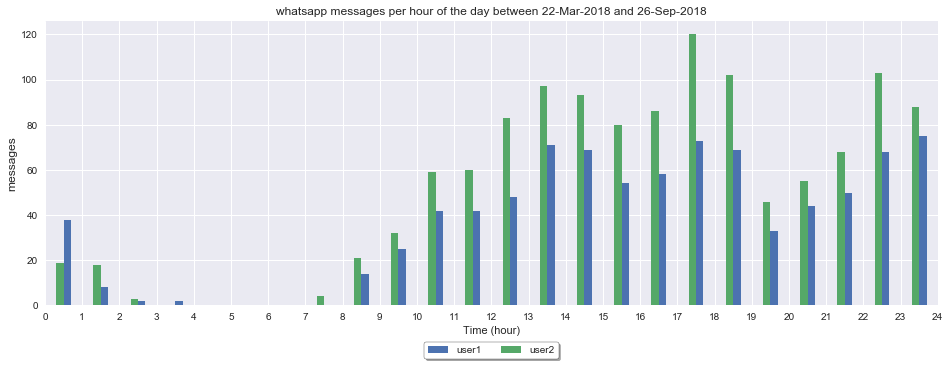

In [9]:
# plot
fig = plt.figure(figsize=(16,16/2.75))
ax = plt.subplot()

# plot average
ax.bar(hourly_messages_df_list[0].index+0.6, hourly_messages_df_list[0].message, width=0.2, align='center', label='user1')
ax.bar(hourly_messages_df_list[1].index+0.4, hourly_messages_df_list[1].message, width=0.2, label='user2')

# format axes
ax.set_xlabel('Time (hour)')
ax.set_ylabel('messages', fontsize=12)
ax.set_xlim(-0,24)
ax.set_xticks(range(25))

# format legend
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
leg = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.11),
                frameon=True, facecolor='white', edgecolor='black', shadow=True, ncol=5)

# create title
start_date = time_user_df.index[0].strftime('%d-%b-%Y')
end_date   = time_user_df.index[-1].strftime('%d-%b-%Y')
ax.set_title('whatsapp messages per hour of the day between %s and %s'%(start_date, end_date))

# save figure
fig.savefig(r'figures\whatsapp_message_analysis.png', bbox_inches='tight')